In [1]:
import os
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx
import pandas as pd

In [2]:
path = r'T:\MPO\RTP\FY20 2045 Update\Data and Resources\Data\ForAppendixF\Historic'

In [3]:
EUGsites = gpd.read_file(os.path.join(path, 'Eugene', 'CL_NR_HistoricSites_July2021.shp'))

In [4]:
EUGsites.head()

,cultural_r,common_nam,historic_n,constructi,designatio,designat_1,maptaxlot,site_house,site_hou_1,site_stree,...,map,taxlot,id,file,NR_effecti,NR_removal,LM_effecti,LM_removal,demolition,geometry
0,9.0,PETERS-LISTON-WINTERMERE HOUSE,PETERS-LISTON-WINTERMERE HOUSE,1871,None,NR,1703314307800,1611.0,None,None,...,17033143.0,7800.0,9,None,1990-10-25,None,1975-11-24,None,None,POINT (4238561.000 876346.000)
1,11.0,LANE COUNTY CLERKS BLDG,LANE COUNTY CLERK’S BUILDING,1853,None,NR,1703313209900,740.0,None,W,...,17033132.0,9900.0,11,None,1983-11-25,None,1975-11-24,None,None,POINT (4235956.000 877000.000)
2,128.0,None,PSI ALPHA CHAPTER CHI OMEGO HOUSE,c. 1925,TH,NR,1703323400400,1461.0,None,None,...,17033234.0,400.0,128,None,2001-12-28,None,None,None,None,POINT (4242997.000 876797.000)
3,210.0,ICKY'S TEA HOUSE,SURATA SOY FOODS,c. 1935,DI,NR,1704254407700,304.0,None,None,...,17042544.0,7700.0,210,None,1993-09-21,None,1994-03-10,None,None,POINT (4235081.000 881658.000)
4,211.0,None,F P ALLEN HOUSE,c. 1900,None,NR,1704254407802,312.0,None,None,...,17042544.0,7802.0,211,None,1993-09-21,None,1994-03-10,None,None,POINT (4235083.000 881578.000)


In [5]:
# include only national register sites
EUGsites = EUGsites[EUGsites.on_nationa == 1]

In [6]:
geodatabase = r'T:\MPO\RTP\FY20 2045 Update\Maps\Appendix F\Maps4AppendixF\Maps4AppendixF.gdb'

In [7]:
nps_sites = gpd.read_file(geodatabase, layer = 'nrhp_locations_JSONToFeature')

In [8]:
nps_sites.head()

,NRIS_Refnum,PROPERTY_ID,RESNAME,ResType,Address,City,County,State,Vicinity,MultiName,...,SOURCE,SRC_DATE,SRC_SCALE,SRC_ACCU,SRC_COORD,ORIGINATOR,CONSTRANT,CR_ID,GEOM_ID,geometry
0,82001508,82001508,Eugene Hotel,Building,222 E. Broadway,Eugene,Lane,OREGON,,,...,National Register of Historic Places -- Nation...,1982-10-07T00:00:00,1:24000,+/- 12 meters,Coordinates are typically provided in UTM form...,National Register of Historic Places -- Nation...,Extant status and datum information for resour...,{BAB1CCD8-7410-496A-8341-3AB0A3507D96},{0130F5C1-5385-456E-8BFE-C3C11F9F6591},POINT (-123.08933 44.04963)
1,83004174,83004174,Lane County Clerk's Building,Building,740 W. 13th Ave.,Eugene,Lane,OREGON,,,...,National Register of Historic Places -- Nation...,1983-11-25T00:00:00,1:24000,+/- 12 meters,Coordinates are typically provided in UTM form...,National Register of Historic Places -- Nation...,Extant status and datum information for resour...,{41FA9530-DDAD-4C50-893E-BF4013EE5492},{95AEBA97-4895-45C5-AF46-1E511492FEB3},POINT (-123.10380 44.04467)
2,85001351,85001351,Johnson Hall,Building,E. 13th between University and Kincaid Sts.,Eugene,Lane,OREGON,,,...,National Register of Historic Places -- Nation...,1985-06-20T00:00:00,1:24000,+/- 12 meters,Coordinates are typically provided in UTM form...,National Register of Historic Places -- Nation...,Extant status and datum information for resour...,{171EA765-D63F-4D7C-BA8B-E7139837C07E},{9CF903DD-3B66-48B5-81AB-062C0702B3EE},POINT (-123.07584 44.04505)
3,83002159,83002159,Springfield General Hospital,Building,846 F St.,Springfield,Lane,OREGON,,,...,National Register of Historic Places -- Nation...,1983-09-01T00:00:00,1:24000,+/- 12 meters,Coordinates are typically provided in UTM form...,National Register of Historic Places -- Nation...,Extant status and datum information for resour...,{0EEC8D94-6431-466F-B818-49245CF54F96},{89AF4CAB-207E-441B-AFAE-F847BCBEF241},POINT (-123.01430 44.05156)
4,74001690,74001690,First Presbyterian Church,Building,216 S. 3rd St.,Cottage Grove,Lane,OREGON,,,...,National Register of Historic Places -- Nation...,1974-12-31T00:00:00,1:24000,+/- 12 meters,Coordinates are typically provided in UTM form...,National Register of Historic Places -- Nation...,Extant status and datum information for resour...,{BBB7264A-A616-4C94-89C3-623D72B499E1},{EA38872E-101D-498C-A775-88CE04974854},POINT (-123.06458 43.79493)


In [9]:
nps_sites.columns

Index(['NRIS_Refnum', 'PROPERTY_ID', 'RESNAME', 'ResType', 'Address', 'City',
       'County', 'State', 'Vicinity', 'MultiName', 'NumCBldg', 'NumCObj',
       'NumCSite', 'NumCStru', 'Status', 'Is_NHL', 'Status_Date',
       'Listed_Date', 'NARA_URL', 'BND_TYPE', 'BND_OTHER', 'IS_EXTANT',
       'EXTANT_OTH', 'CREATEDATE', 'EDIT_DATE', 'MAP_METHOD', 'MAP_MTH_OT',
       'SOURCE', 'SRC_DATE', 'SRC_SCALE', 'SRC_ACCU', 'SRC_COORD',
       'ORIGINATOR', 'CONSTRANT', 'CR_ID', 'GEOM_ID', 'geometry'],
      dtype='object')

In [10]:
# include only national register sites and sites in Eugene
nps_sites = nps_sites[(nps_sites.Status == 'Listed') & (nps_sites.City.isin(['Eugene', 'Springfield','Coburg']))]

In [11]:
nps_sites.shape

(53, 37)

In [12]:
# convert the historic names for comparisons
EUGsites['historic_n'] = [x.title() for x in [str(i or '') for i in EUGsites.historic_n]]

In [13]:
len(EUGsites.geometry.unique())

128

In [14]:
len(EUGsites.historic_n.unique())

125

In [15]:
len(EUGsites.cultural_r.unique())

155

In [16]:
shpoSites = gpd.read_file(os.path.join(path, 'SHPO', 'HistoricSites-point.shp'))

In [17]:
shpoSites.columns

Index(['OBJECTID', 'RESOURCE_I', 'SOURCE', 'Confidence', 'CREATOR',
       'CREATEDATE', 'EDITOR', 'EDITDATE', 'Comments', 'SHPO_REVIE',
       'resource_1', 'propName', 'address', 'city', 'county', 'yrBuilt',
       'height', 'origUse', 'primStyle', 'secStyle', 'planTypeDe',
       'sidingMat1', 'sidingMat2', 'elig', 'ilsDate', 'rlsDate', 'nrStat',
       'nrDateList', 'HistDist', 'GlobalID', 'geometry'],
      dtype='object')

In [18]:
shpoSites.head()

,OBJECTID,RESOURCE_I,SOURCE,Confidence,CREATOR,CREATEDATE,EDITOR,EDITDATE,Comments,SHPO_REVIE,...,sidingMat1,sidingMat2,elig,ilsDate,rlsDate,nrStat,nrDateList,HistDist,GlobalID,geometry
0,1818,20117.0,OrthoPhoto,1,SHPO Staff,1337069373000,GIS,1582674831000,DNW,1,...,Wood:Other/Undefined,Wood:Other/Undefined,eligible/significant,None,01/23/2001,Individually Listed,02/24/1993,None,{00614FBB-73C4-4349-8329-BD04778A60C5},POINT (648978.711 846933.716)
1,1836,20135.0,OrthoPhoto,1,SHPO Staff,1337069288000,GIS,1582674831000,DNW,1,...,Concrete Block,None,eligible/significant,None,01/23/2001,Individually Listed,06/01/2011,None,{AB0FB5CA-3BC9-4FD0-AC59-F3FAD08E9E54},POINT (650919.612 847523.352)
2,1871,20170.0,OrthoPhoto,1,SHPO Staff,1337069373000,GIS,1582674831000,DNW,1,...,Wood:Other/Undefined,Wood:Other/Undefined,eligible/significant,None,None,Individually Listed,11/01/1979,None,{376BFC4F-74FC-4114-82BA-91025353FF7F},POINT (644058.628 850040.091)
3,2195,20494.0,OrthoPhoto,1,SHPO Staff,1337069123000,GIS,1582674831000,DNW,1,...,Brick:Other/Undefined,Stucco,eligible/significant,None,01/30/2001,Individually Listed,02/23/1996,None,{34A6BBDA-3F0D-4589-AA21-931906BAFFC7},POINT (650380.886 847199.091)
4,2277,20577.0,OrthoPhoto,1,SHPO Staff,1337069374000,GIS,1582674831000,DNW,1,...,Wood:Other/Undefined,Concrete Block,eligible/significant,None,None,Individually Listed,06/22/1988,Dorris Ranch Historic District,{62968B09-6306-4A47-B67F-DE4959D99D1C},POINT (650200.772 840498.879)


In [19]:
# include only national register sites and sites in Eugene
shpoSites = shpoSites[pd.notnull(shpoSites['nrStat']) & (shpoSites.city.isin(['Eugene', 'Springfield','Coburg']))]

In [20]:
shpoSites.shape

(88, 31)

In [21]:
len(shpoSites.resource_1.unique())

88

In [22]:
EUGsites = EUGsites.to_crs(epsg=3857)

In [23]:
nps_sites = nps_sites.to_crs(epsg=3857)

In [24]:
shpoSites = shpoSites.to_crs(epsg=3857)

In [25]:
SPRsites = gpd.read_file(os.path.join(path, 'Springfield', 'RLS_Historic_Survey.shp'))

In [26]:
SPRsites.columns

Index(['RLS_Import', 'import_ID', 'resource_I', 'historicNa', 'otherNames',
       'strNbr', 'address', 'CONCAT_ADD', 'location', 'City', 'county_Nam',
       'primCircaF', 'primConstr', 'secCircaFl', 'secConstrY', 'resourceTy',
       'height', 'RLS_Date', 'ILS_Date', 'histFunc', 'archSubCat',
       'archSubC_1', 'primSid', 'secSid', 'planTypeDe', 'shpoEvalua',
       'nr_status', 'dateListed', 'geometry'],
      dtype='object')

In [27]:
SPRsites[SPRsites.nr_status == 'NRI']

,RLS_Import,import_ID,resource_I,historicNa,otherNames,strNbr,address,CONCAT_ADD,location,City,...,histFunc,archSubCat,archSubC_1,primSid,secSid,planTypeDe,shpoEvalua,nr_status,dateListed,geometry
58,32156.0,32156.0,20117.0,Southern Pacific Railroad Passenger Station & ...,Springfield Depot; Springfield Chamber of Comm...,101,S A St,101 S A St,S A St,Springfield,...,Rail Related,Stick,Queen Anne,Wood:Other/Undefined,Wood:Other/Undefined,None,ES,NRI,24-Feb-93,POINT (4257731.000 877000.000)
66,32209.0,32209.0,20170.0,"Campbell, Robert E, House",None,890,Aspen St,890 Aspen St,Aspen St,Springfield,...,Single Dwelling,Gothic Revival,None,Wood:Other/Undefined,Wood:Other/Undefined,None,ES,NRI,01-Nov-79,POINT (4252806.000 880080.000)
159,32533.0,32533.0,20494.0,Oregon Power Company Springfield Substation,City of Springfield Museum; Mountain States Po...,590,Main St,590 Main St,Main St,Springfield,...,Energy Facility,Utilitarian,None,Brick:Other/Undefined,Stucco,None,ES,NRI,23-Feb-96,POINT (4259152.000 877288.000)
195,32616.0,32616.0,20577.0,Dorris Ranch Historic District,None,None,S 2nd & Dorris St,None,S 2nd & Dorris St,Springfield vcty,...,Farmstead,Gothic Revival,Bungalow (Type),Wood:Other/Undefined,Concrete Block,None,ES,NRI,22-Jun-88,POINT (4258674.897 870948.213)


In [28]:
SPRsites[SPRsites.nr_status == 'XNR']

,RLS_Import,import_ID,resource_I,historicNa,otherNames,strNbr,address,CONCAT_ADD,location,City,...,histFunc,archSubCat,archSubC_1,primSid,secSid,planTypeDe,shpoEvalua,nr_status,dateListed,geometry
160,32559.0,32559.0,20520.0,Brattain-Hadley House,None,1260,Main St,1260 Main St,Main St,Springfield,...,Single Dwelling,Queen Anne,None,Wood:Other/Undefined,Wood:Other/Undefined,None,XD,XNR,14-Sep-95,POINT (4261983.000 877180.000)


In [29]:
SPRsites = SPRsites[pd.notnull(SPRsites['nr_status'])]

In [30]:
SPRsites = SPRsites.to_crs(epsg=3857)

In [31]:
MPObd = gpd.read_file("V:/Data/Transportation/MPO_Bound.shp")

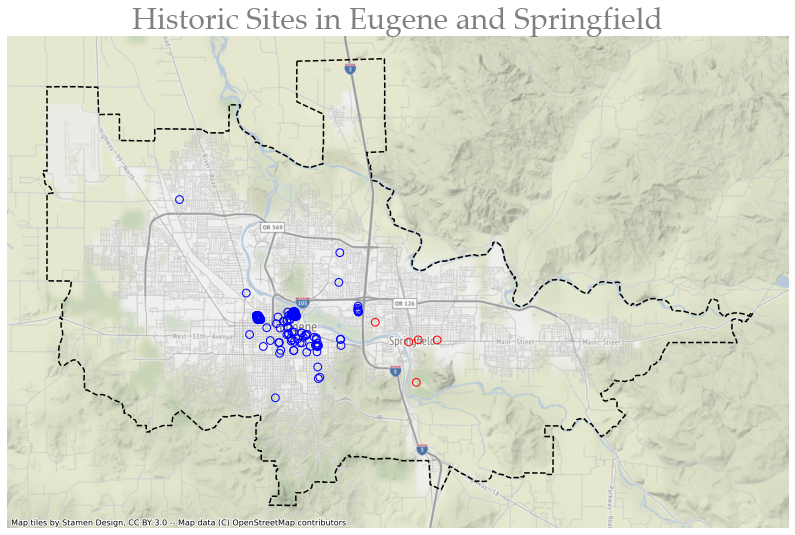

In [32]:
fig, ax = plt.subplots(figsize=(14, 12))
EUGsites.plot(ax=ax, marker ='o', facecolor="none", edgecolor="blue", markersize=60, aspect=1)
SPRsites.plot(ax=ax, marker ='o', facecolor="none", edgecolor="red", markersize=60, aspect=1)
MPObd.plot(ax=ax, facecolor="none", edgecolor="black", linestyle='--', linewidth = 1.5, aspect=1)
ctx.add_basemap(ax, alpha = 0.7)
plt.title("Historic Sites in Eugene and Springfield", fontsize=30, fontname="Palatino Linotype", 
          color="grey")
ax.axis("off");

In [33]:
nps_sites = gpd.clip(nps_sites, MPObd)

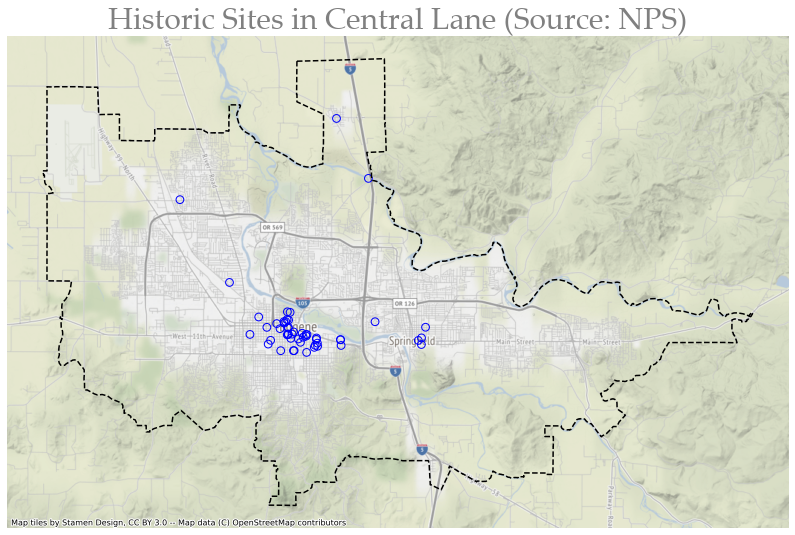

In [34]:
fig, ax = plt.subplots(figsize=(14, 12))
nps_sites.plot(ax=ax, marker ='o', facecolor="none", edgecolor="blue", markersize=60, aspect=1)
MPObd.plot(ax=ax, facecolor="none", edgecolor="black", linestyle='--', linewidth = 1.5, aspect=1)
ctx.add_basemap(ax, alpha = 0.7)
plt.title("Historic Sites in Central Lane (Source: NPS)", fontsize=30, fontname="Palatino Linotype", 
          color="grey")
ax.axis("off");

In [35]:
shpoSites = gpd.clip(shpoSites, MPObd)

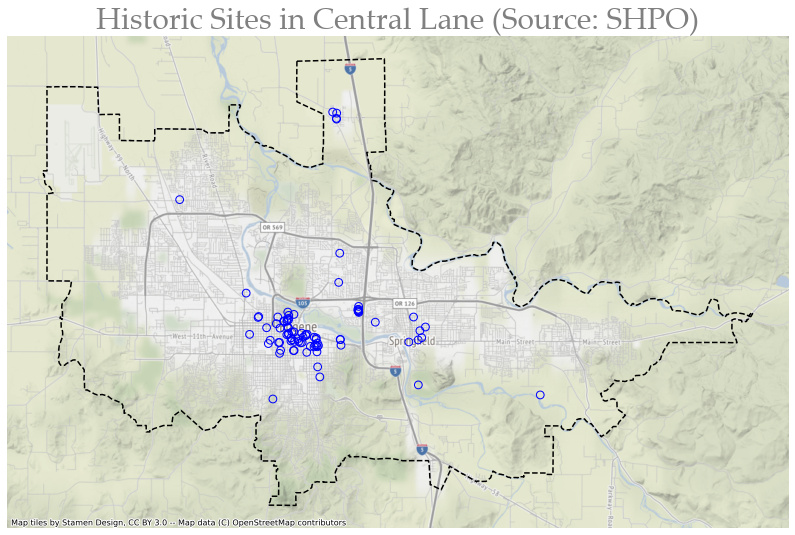

In [36]:
fig, ax = plt.subplots(figsize=(14, 12))
shpoSites.plot(ax=ax, marker ='o', facecolor="none", edgecolor="blue", markersize=60, aspect=1)
MPObd.plot(ax=ax, facecolor="none", edgecolor="black", linestyle='--', linewidth = 1.5, aspect=1)
ctx.add_basemap(ax, alpha = 0.7)
plt.title("Historic Sites in Central Lane (Source: SHPO)", fontsize=30, fontname="Palatino Linotype", 
          color="grey")
ax.axis("off");

In [37]:
EUGsites.columns

Index(['cultural_r', 'common_nam', 'historic_n', 'constructi', 'designatio',
       'designat_1', 'maptaxlot', 'site_house', 'site_hou_1', 'site_stree',
       'site_str_1', 'site_str_2', 'on_nationa', 'is_city_la', 'is_point_o',
       'x_coordina', 'y_coordina', 'cultural_1', 'has_web_ph', 'style',
       'latitude', 'longitude', 'address', 'map', 'taxlot', 'id', 'file',
       'NR_effecti', 'NR_removal', 'LM_effecti', 'LM_removal', 'demolition',
       'geometry'],
      dtype='object')

In [38]:
EUGsites['city'] = 'Eugene'

In [39]:
newEUGsites = EUGsites[['cultural_r', 'historic_n', 'address', 'city', 'constructi', 'geometry']]

In [40]:
newEUGsites = newEUGsites.rename(columns={'cultural_r':'id', 'historic_n':'name', 'constructi':'yrbuilt'})

In [41]:
newEUGsites['address'] = [x.title() for x in [str(i or '') for i in newEUGsites.address]]

In [42]:
newEUGsites.head()

,id,name,address,city,yrbuilt,geometry
0,9.0,Peters-Liston-Wintermere House,1611 Lincoln St,Eugene,1871,POINT (-13703053.145 5471963.135)
1,11.0,Lane County Clerk’S Building,740 W 13Th Ave,Eugene,1853,POINT (-13704164.006 5472206.456)
2,128.0,Psi Alpha Chapter Chi Omego House,1461 Alder St,Eugene,c. 1925,POINT (-13701182.016 5472212.864)
3,210.0,Surata Soy Foods,304 Blair Blvd,Eugene,c. 1935,POINT (-13704595.708 5474172.923)
4,211.0,F P Allen House,312 Blair Blvd,Eugene,c. 1900,POINT (-13704593.806 5474138.974)


In [43]:
newEUGsites.shape

(155, 6)

In [44]:
newEUGsites = newEUGsites.drop_duplicates(subset=['geometry'], keep='last')

In [45]:
len(newEUGsites.geometry.unique())

128

In [46]:
newEUGsites['id'] = newEUGsites.id.astype(int)

In [47]:
shpoSites.columns

Index(['OBJECTID', 'RESOURCE_I', 'SOURCE', 'Confidence', 'CREATOR',
       'CREATEDATE', 'EDITOR', 'EDITDATE', 'Comments', 'SHPO_REVIE',
       'resource_1', 'propName', 'address', 'city', 'county', 'yrBuilt',
       'height', 'origUse', 'primStyle', 'secStyle', 'planTypeDe',
       'sidingMat1', 'sidingMat2', 'elig', 'ilsDate', 'rlsDate', 'nrStat',
       'nrDateList', 'HistDist', 'GlobalID', 'geometry'],
      dtype='object')

In [48]:
newShpoSites = shpoSites[['resource_1', 'propName', 'address', 'city', 'yrBuilt', 'geometry']]

In [49]:
newShpoSites = newShpoSites.rename(columns = {'resource_1': 'id', 'propName': 'name', 'yrBuilt':'yrbuilt'})

In [50]:
newShpoSites = newShpoSites[newShpoSites.city.isin(['Springfield', 'Coburg'])]

In [51]:
histSites = newEUGsites.append(newShpoSites)

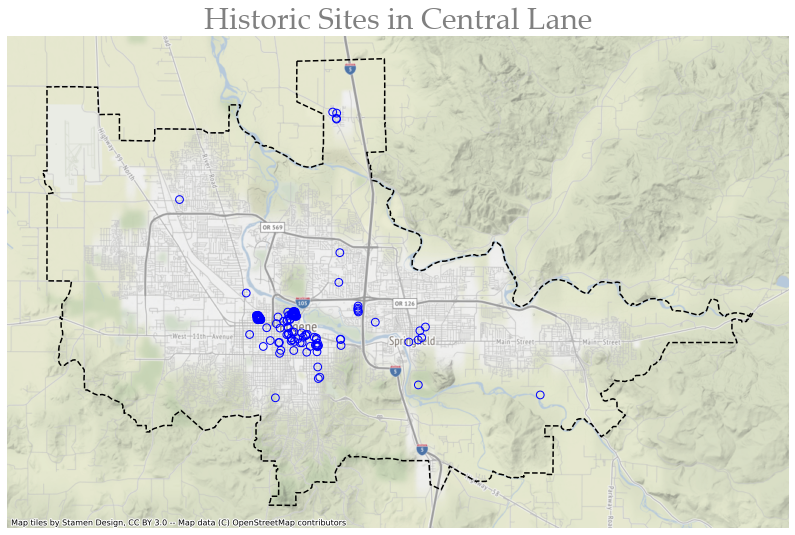

In [54]:
fig, ax = plt.subplots(figsize=(14, 12))
histSites.plot(ax=ax, marker ='o', facecolor="none", edgecolor="blue", markersize=60, aspect=1)
MPObd.plot(ax=ax, facecolor="none", edgecolor="black", linestyle='--', linewidth = 1.5, aspect=1)
ctx.add_basemap(ax, alpha = 0.7)
plt.title("Historic Sites in Central Lane", fontsize=30, fontname="Palatino Linotype", 
          color="grey")
ax.axis("off");

In [56]:
histSites.to_file(os.path.join(path, 'NationalRegisterHistoricSitesCLMPO.shp'))

In [57]:
SPRsites = histSites[histSites.city=='Springfield']

In [62]:
SPRsites

,id,name,address,city,yrbuilt,geometry
0,20117,Southern Pacific Railroad Passenger Station & ...,101 S A St,Springfield,1891,POINT (-13694947.040 5472488.725)
1,20135,Springfield Motors Buick Dealership,702 N A St,Springfield,c.1953,POINT (-13694133.187 5472764.478)
2,20170,"Campbell, Robert E, House",890 Aspen Dr,Springfield,1870,POINT (-13697070.225 5473743.683)
3,20494,Oregon Power Company Springfield Substation,590 Main St,Springfield,1911,POINT (-13694357.003 5472619.733)
4,20577,Dorris Ranch Historic District,S 2nd & Dorris Aves,Springfield,1899,POINT (-13694346.223 5469771.983)
5,20632,Springfield General Hospital,846 F St,Springfield,1914,POINT (-13693895.872 5473438.590)
6,20634,Washburne Historic District,[District],Springfield,1890,POINT (-13694248.881 5473202.899)
198,676211,"Clearwater, Jacob, Farmhouse",1656 Clearwater Lane,Springfield,c.1864,POINT (-13686627.866 5469136.864)


In [63]:
SPRsites = SPRsites.drop(columns='city')

In [64]:
SPRsites.to_file(os.path.join(path, 'Springfield', 'NationalRegisterHistoricSitesSPR.shp'))